In [1]:
from indra_cogex.client import Neo4jClient
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
client = Neo4jClient()

INFO: [2024-03-14 01:54:12] numexpr.utils - NumExpr defaulting to 8 threads.
INFO: [2024-03-14 01:54:14] indra_cogex.client.neo4j_client - Using configured URL for INDRA neo4j connection
INFO: [2024-03-14 01:54:14] indra_cogex.client.neo4j_client - Using configured credentials for INDRA neo4j connection


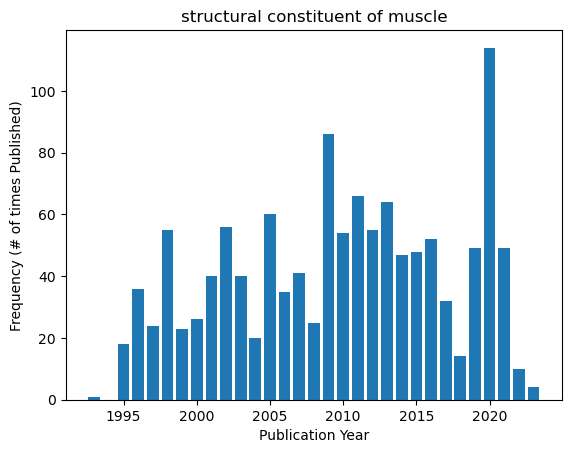

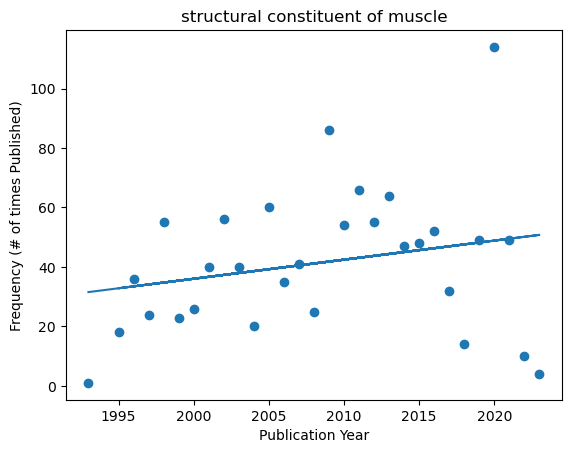

There is an positive trend in the frequency of publications on  structural constituent of muscle


,id,name,year,count
0,go:0008307,structural constituent of muscle,2020.0,114
1,go:0008307,structural constituent of muscle,2021.0,49
2,go:0008307,structural constituent of muscle,2009.0,86
3,go:0008307,structural constituent of muscle,2007.0,41
4,go:0008307,structural constituent of muscle,2012.0,55
5,go:0008307,structural constituent of muscle,2011.0,66
6,go:0008307,structural constituent of muscle,2013.0,64
7,go:0008307,structural constituent of muscle,2016.0,52
8,go:0008307,structural constituent of muscle,2008.0,25
9,go:0008307,structural constituent of muscle,2015.0,48


In [7]:
# Version 1 not including isa relationships 
def plot_histogram(user):
    """
    Parameters
    ----------
    user : string
        This is the id, name or other property the user chooses to enter

    Returns
    -------
    df : This is the dataframe with the data of a biological process passed in by the user, 
         containing the id, name, year and count
        
    """
    # saving the cypher into a string
    # associated_with relationship should be extended to a path, to access the go terms that are
    # indirectly associated with it (use is_a relationship)
    cypher = """MATCH p1=(process:BioEntity {type:'biological_process',""" + user + """})<-[:associated_with]-(a) 
    MATCH p2=(process)<-[:associated_with]-(b) 
    MATCH p3=(a)-[r:indra_rel]->(b) 
    MATCH p4=(e:Evidence)-[]->(pub:Publication) 
    WHERE a.id <> b.id AND e.stmt_hash = r.stmt_hash 
    RETURN process.id,process.name,pub.year,count(pub.year)"""
    
    # using query_tx to get the result
    results = client.query_tx(cypher)
    # creating a dataframe with the necessary data
    df = pd.DataFrame(results, columns=["id", "name", "year", "count"])
    
    # plotting and labeling a bar chart
    # chose to do bar chart instead of a histogram because the frequency was another column 
    plt.xlabel("Publication Year")
    plt.ylabel("Frequency (# of times Published)")
    plt.title(df["name"].values[0])
    plt.bar(df["year"],df["count"])
    plt.show()
    
    # this block of code informs the popularity of research of the chosen biological processes 
    # dropping null values
    df = df.dropna()
    x = df["year"]
    y = df["count"]
    plt.xlabel("Publication Year")
    plt.ylabel("Frequency (# of times Published)")
    plt.title(df["name"].values[0])
    # plotting a scatterplot 
    plt.scatter(x,y)
    # creating a line of best fit
    a, b = np.polyfit(x, y, 1)  
    plt.plot(x, a * x + b)  
    plt.show()
    
    
    # if the slope is greater than 0, there is a positive trend, and if the slope is 0 there is a negative trend
    # one challenge may be that in general as the years go on, the frequency of publications in general
    # increase, so this may be a slightly innaccurate way to go about determining popularity trends
    # to account for this normalize by amount of indra statments per year, 
    if a > 0:
        print("There is an positive trend in the frequency of publications on ", df["name"].values[0])
    else:
        print("There is an decreasing trend in the frequency of publications on ", df["name"].values[0])
        
    return df

# the user can input the id, name or whichever property they choose 
# Three examples with a mix of names and ids being passed in 
#user_input = "id:'go:0008307'"
user_input = "name:'structural constituent of muscle'"
plot_histogram(user_input)

#user_input = "name:'regulation of gastrulation'"
#plot_histogram(user_input)

#user_input = "id:'go:0007411'"
#plot_histogram(user_input)

#user_input = "name:'membrane protein ectodomain proteolysis'"
#plot_histogram(user_input)

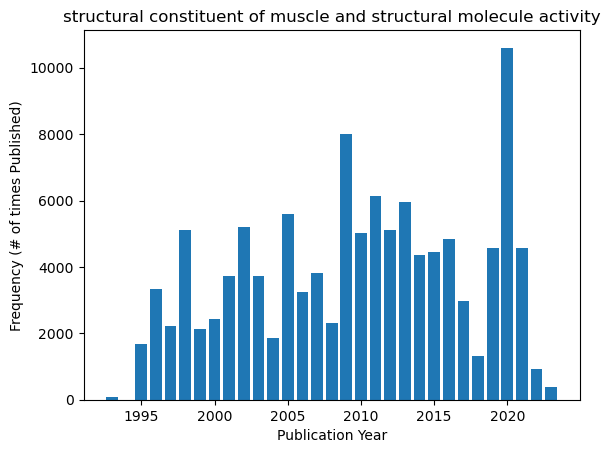

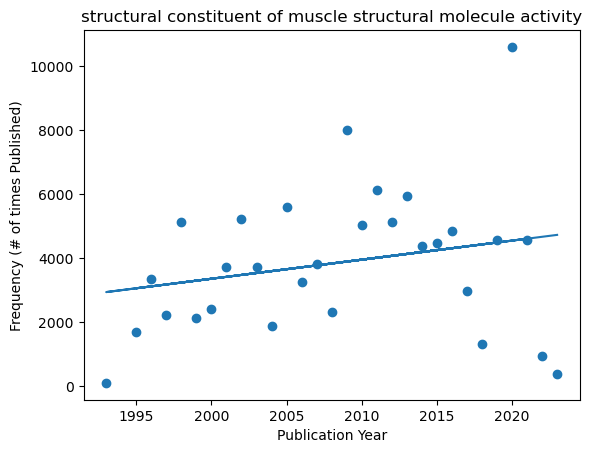

There is an positive trend in the frequency of publications on  structural constituent of muscle


,id,name,year,count,parent_id,parent_name
0,go:0008307,structural constituent of muscle,2009.0,7998,go:0005198,structural molecule activity
1,go:0008307,structural constituent of muscle,2020.0,10602,go:0005198,structural molecule activity
2,go:0008307,structural constituent of muscle,2021.0,4557,go:0005198,structural molecule activity
3,go:0008307,structural constituent of muscle,2013.0,5952,go:0005198,structural molecule activity
4,go:0008307,structural constituent of muscle,2012.0,5115,go:0005198,structural molecule activity
5,go:0008307,structural constituent of muscle,2014.0,4371,go:0005198,structural molecule activity
6,go:0008307,structural constituent of muscle,2002.0,5208,go:0005198,structural molecule activity
7,go:0008307,structural constituent of muscle,2006.0,3255,go:0005198,structural molecule activity
8,go:0008307,structural constituent of muscle,2015.0,4464,go:0005198,structural molecule activity
9,go:0008307,structural constituent of muscle,2007.0,3813,go:0005198,structural molecule activity


In [21]:
# version 2 including isa relationships 
def new_histogram(user):
    """
    Parameters
    ----------
    user : string
        This is the id, name or other property the user chooses to enter

    Returns
    -------
    df : This is the dataframe with the data of a biological process passed in by the user, 
         containing the id, name, year and count
        
    """
    # saving the cypher into a string
    # associated_with relationship should be extended to a path, to access the go terms that are
    # indirectly associated with it (use is_a relationship)
    cypher = """MATCH p1=(process:BioEntity {type:'biological_process', id:'go:0008307'})-[:isa]->(a)
    MATCH p2 = (process)<-[:associated_with]-(c)
    MATCH p3 = (process)<-[:associated_with]-(d)
    MATCH p4=(a)<-[:associated_with]-(b)
    MATCH p5=(a)<-[:associated_with]-(f)
    MATCH p6=(c)-[r:indra_rel]->(d)
    MATCH p7=(b)-[:indra_rel]->(f)
    MATCH p8=(e:Evidence)-[]->(pub:Publication)
    WHERE c.id <> d.id AND b.id<> f.id AND e.stmt_hash = r.stmt_hash
    RETURN process.id,process.name,pub.year,count(pub.year), a.id, a.name"""
   
    # using query_tx to get the result
    results = client.query_tx(cypher)
    # creating a dataframe with the necessary data
    # im not going to know how many isa relationships there will be, this example happened to have 1 other relationship 
    # so I was able to add it in 
    df = pd.DataFrame(results, columns=["id", "name", "year", "count", "parent_id", "parent_name"])
    
    # plotting and labeling a bar chart
    # chose to do bar chart instead of a histogram because the frequency was another column 
    plt.xlabel("Publication Year")
    plt.ylabel("Frequency (# of times Published)")
    plt.title(df["name"].values[0] + " and " + df["parent_name"].values[0])
    plt.bar(df["year"],df["count"])
    plt.show()
    
    # this block of code informs the popularity of research of the chosen biological processes 
    # dropping null values
    df = df.dropna()
    x = df["year"]
    y = df["count"]
    plt.xlabel("Publication Year")
    plt.ylabel("Frequency (# of times Published)")
    plt.title(df["name"].values[0] + " " + df["parent_name"].values[0])
    # plotting a scatterplot 
    plt.scatter(x,y)
    # creating a line of best fit
    a, b = np.polyfit(x, y, 1)  
    plt.plot(x, a * x + b)  
    plt.show()
    
    
    # if the slope is greater than 0, there is a positive trend, and if the slope is 0 there is a negative trend
    # one challenge may be that in general as the years go on, the frequency of publications in general
    # increase, so this may be a slightly innaccurate way to go about determining popularity trends
    # to account for this normalize by amount of indra statments per year, 
    if a > 0:
        print("There is an positive trend in the frequency of publications on ", df["name"].values[0])
    else:
        print("There is an decreasing trend in the frequency of publications on ", df["name"].values[0])
        
    return df

# the user can input the id, name or whichever property they choose 
# Three examples with a mix of names and ids being passed in 
#user_input = "id:'go:0008307'"
user_input = "name:'structural constituent of muscle'"
new_histogram(user_input)

#user_input = "name:'regulation of gastrulation'"
#plot_histogram(user_input)

#user_input = "id:'go:0007411'"
#plot_histogram(user_input)

#user_input = "name:'membrane protein ectodomain proteolysis'"
#plot_histogram(user_input)

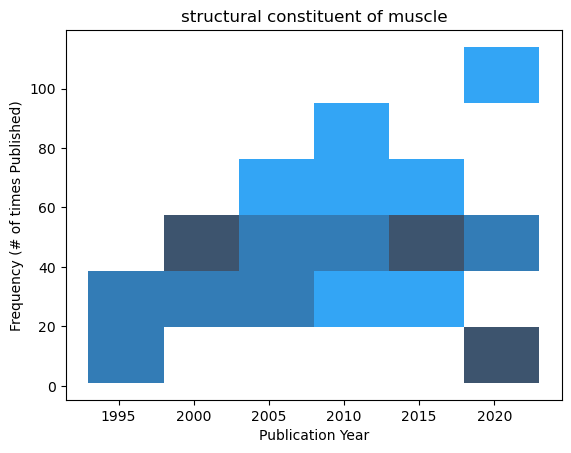

In [3]:
# This function attempts to plot a histogram instead of a bar chart using seaborn 
# by using the frequency column as the actual frequency 
def plot_histogram(user):
    """
    Parameters
    ----------
    user : string
        This is the id, name or other property the user chooses to enter

    Returns
    -------
    none
        
    """
    cypher = "MATCH p1=(process:BioEntity {type:'biological_process'," + user + "})<-[:associated_with]-(a) MATCH p2=(process)<-[:associated_with]-(b) MATCH p3=(a)-[r:indra_rel]->(b) MATCH p4=(e:Evidence)-[]->(pub:Publication) WHERE a.id <> b.id AND e.stmt_hash = r.stmt_hash RETURN process.id,process.name,pub.year,count(pub.year)"
    results = client.query_tx(cypher)
    df = pd.DataFrame(results, columns=["id", "name", "year", "count"])
    sns.histplot(x = df["year"],y = df["count"])
    plt.xlabel("Publication Year")
    plt.ylabel("Frequency (# of times Published)")
    plt.title(df["name"].values[0])
    plt.show()
    
#user_input = "id:'go:0008307'"
user_input = "name:'structural constituent of muscle'"
plot_histogram(user_input)

# Histogram looks odd as it is not continuous 
